In [1]:
import numpy as np

In [2]:
num_points = 2000
vectors_set = []

In [3]:
for i in range(num_points):
    if np.random.random() > 0.5:
        vectors_set.append([np.random.normal(0.0, 0.9),
                           np.random.normal(0.0, 0.9)])
    else:
        vectors_set.append([np.random.normal(3.0, 0.5),
                           np.random.normal(1.0, 0.5)])

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
import seaborn as sns

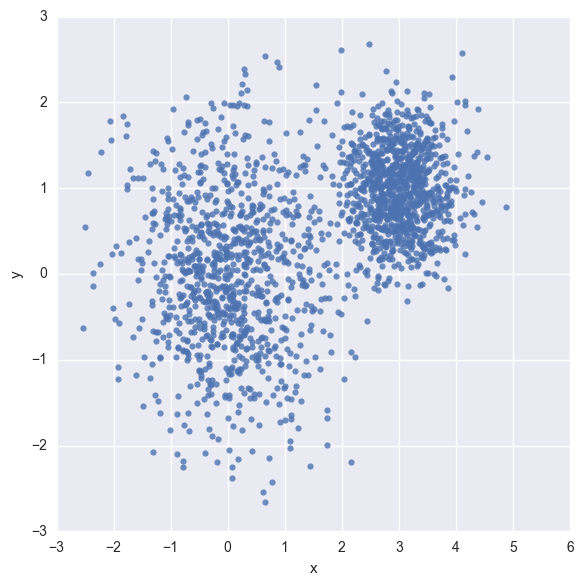

In [8]:
df = pd.DataFrame({"x": [v[0] for v in vectors_set],
                  "y": [v[1] for v in vectors_set]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()

In [25]:
import tensorflow as tf
vectors = tf.constant(vectors_set) # Making random variables using vecotr
k = 10
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1])) # Selecting randomly centers
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)
assignments = tf.argmin(tf.reduce_sum(tf.square(tf.sub(expanded_vectors, expanded_centroides)), 2), 0)

means = tf.concat(0, [tf.reduce_mean(tf.gather(vectors,
                                              tf.reshape(tf.where(tf.equal(assignments, c)), [1,-1])),
                                    reduction_indices=[1]) for c in range(k)])

update_centroides = tf.assign(centroides, means)

init_op = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init_op)
for step in range(100):
    _, centroid_values, assignment_values = sess.run([update_centroides, centroides, assignments])

In [26]:
data = {"x":[], "y":[], "cluster":[]}
for i in range(len(assignment_values)):
    data['x'].append(vectors_set[i][0])
    data['y'].append(vectors_set[i][1])
    data['cluster'].append(assignment_values[i])

In [27]:
df = pd.DataFrame(data)
sns.lmplot("x",'y', data=df, fit_reg=False, size=6, hue='cluster',legend=False)

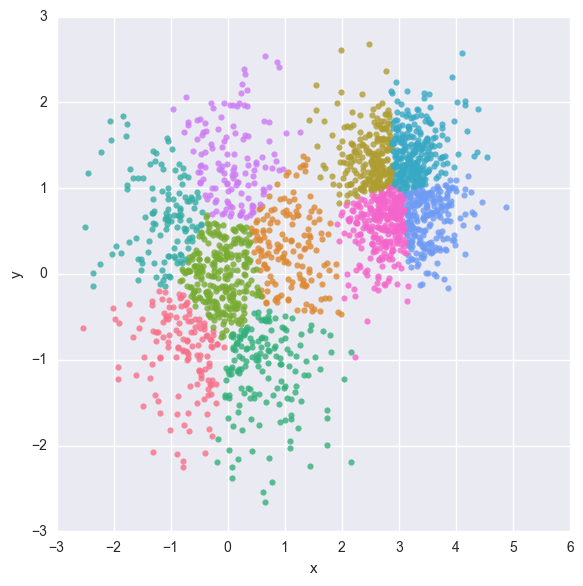

In [28]:
plt.show()